<a href="https://colab.research.google.com/github/DestonSJU/IDS/blob/main/HW6_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. First I import the adult training data and put the data into the adultDF dataframe. After that I encode the data and put it into the encoded dataframe and split it into training and testing data.

In [23]:
#Initial Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [24]:
#More Initial Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#Import csv file
from google.colab import files
Upload = files.upload()

Saving adult_training.csv to adult_training (1).csv


In [26]:
#Creates dataframe using the data
adultDF = pd.read_csv("adult_training.csv")
adultDF.head(10)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
5,40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K
6,38,Private,7,Married-civ-spouse,Sales,Male,0,0,<=50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
9,39,Private,9,Divorced,Exec-managerial,Male,0,0,<=50K


In [27]:
#Set up encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#Create dataframe for the encoded data
encoded_adultDF = pd.DataFrame()

#Goes through the dataframe and enters the encodeded data into the encoded dataframe
for i in range(0, adultDF.shape[1]):
    if adultDF.dtypes[i]=='object' or adultDF.dtypes[i]=='bool':
        encoded_adultDF[adultDF.columns[i]] = le.fit_transform(adultDF[adultDF.columns[i]])
    else:
        encoded_adultDF[adultDF.columns[i]] = adultDF[adultDF.columns[i]]

encoded_adultDF.head(10)


,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,6,13,2,4,1,0,0,0
1,38,4,9,0,6,1,0,0,0
2,49,4,5,3,8,0,0,0,0
3,52,6,9,2,4,1,0,0,1
4,31,4,14,4,10,0,14084,0,1
5,40,4,11,2,3,1,0,0,1
6,38,4,7,2,12,1,0,0,0
7,43,4,7,2,14,1,0,2042,0
8,54,0,10,2,0,1,0,0,1
9,39,4,9,0,4,1,0,0,0


In [28]:
from sklearn.model_selection import train_test_split

#Splits the data into predictors and target
X = encoded_adultDF.filter(['age', 'workclass', 'education', 'marital-status','occupation', 'sex', 'capital-gains-losses'], axis=1)
y = encoded_adultDF['income']


#Splits the data into training and testing data
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=50, shuffle=True, train_size=0.80, stratify=y)


Next I create the makeDTModel function. This function takes in the criterion (gini or entropy), x and y of the training data, max depth, max leaf nodes, and the random state. It then uses these parameters to create and return a classifier.

In [29]:
#Creates a function that uses the parameters the create and return a classifier
def makeDTModel(criterion, X_train, Y_train, max_depth = None, max_leaf_nodes = None, random_state = 80):
    classifier = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, max_leaf_nodes=max_leaf_nodes, random_state = random_state).fit(X_train, Y_train)
    return classifier


I then create the displayTree function. This function takes in a classifier, the x values of a set of data and a boolean variable that determines whether the classifier is using gini or entropy and uses it to create and display a decision tree.

In [30]:
from matplotlib.pyplot import figure
#Creates a function that displays a decision tree using a given classifier and x data
def displayTree(classifier, X, gini: bool):
  #Used if the classifier uses gini
  if (gini == True):
    #Plots the tree and text version of it
    figure(figsize=(10, 8), dpi=80)

    cn = ['low_income', 'hi_income']
    tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(), class_names=cn, filled = True)

    text_representation = tree.export_text(cart_classifier, feature_names=X.columns.values.tolist())
    print(text_representation)

  #Used if the classifier uses entropy
  else:
    #Plots the tree and text version of it
    figure(figsize=(10, 8), dpi=80)

    cn = ['low_income', 'hi_income']
    tree.plot_tree(c5_classifier, feature_names=X.columns.values.tolist(), class_names=cn, filled = True)

    text_representation = tree.export_text(c5_classifier, feature_names=X.columns.values.tolist())
    print(text_representation)


Next I created the displayCM function which takes in a classifier and the x and y values for the training and testing data and creates and displays the confusion maxtrix in both text and heatmap form.

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def displayCM(classifier, X_train, Y_train, X_test, Y_test):

  #Creates predictions using the classifier
  predictions = classifier.predict(X_test)

  #Creates abd prints the confusion matrix
  matrix = confusion_matrix(y_true=Y_test, y_pred = predictions)
  print(matrix)

  #Creates and displays the heatmap for the confusion matrix
  plt.figure(figsize=(8,8))
  sns.heatmap(matrix, annot=True, linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

I then created the compareModels function, which takes in two classifiers and displays the accuracy.

In [32]:
def compareModels(classifier1, classifier2):
  #Finds accuracy of the training and testing data for the first classifier
  score1 = round(classifier1.score(X_train, y_train), 2)
  score2 = round(classifier2.score(X_test, y_test), 2)
  print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))


  #Finds accuracy of the training and testing data for the second classifier
  score3 = round(classifier2.score(X_train, y_train), 2)
  score4 = round(classifier2.score(X_test, y_test), 2)
  print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))

  #Displays the accuracy results of the two models
  labels = ['CART', 'C5.0']
  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)
  width = 0.35

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()

Uses the makeDTModel function to create a cart and c5 classifier.

In [33]:
#Creates cart and c5 classifier
cart_classifier = makeDTModel("gini", X_train, y_train, None, 5, 80)
c5_classifier = makeDTModel("entropy", X_train, y_train, None, 5, 80)

Uses the displayTree function to display the decision trees for the cart and c5 classifier

|--- marital-status <= 2.50
|   |--- education <= 12.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- education >  12.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0

|--- marital-status <= 2.50
|   |--- education <= 12.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- education >  12.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- education <= 12.50
|   |   |--- class: 0
|   |--- education >  12.50
|   |   |--- class: 0



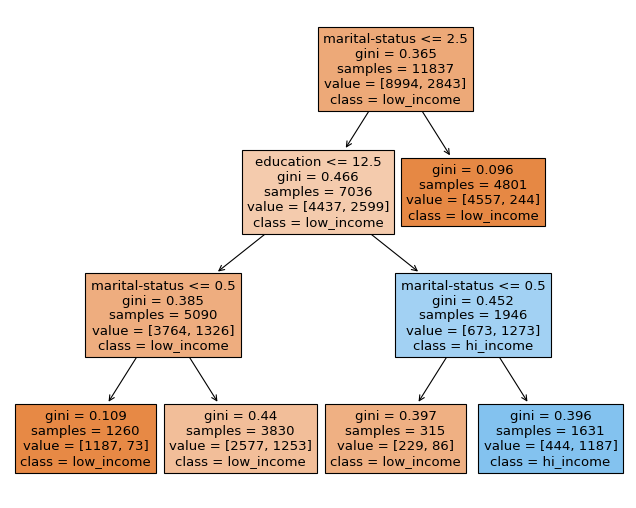

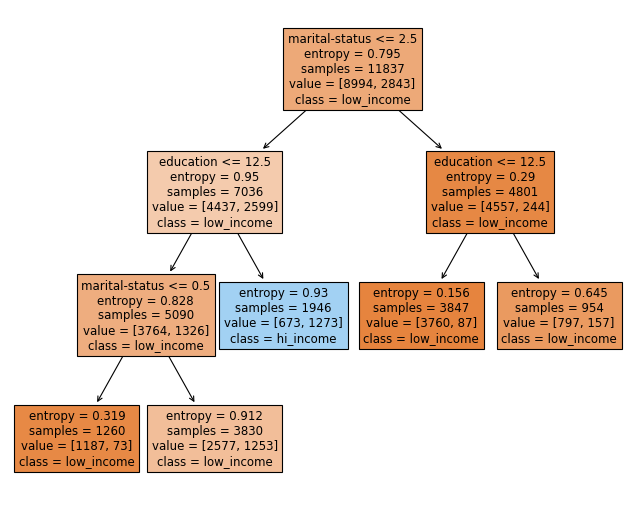

In [34]:
#Displays cart and c5 classifier's decision trees
displayTree(cart_classifier, X, True)
displayTree(c5_classifier, X, False)

I use the displayCM function to display the confusion matrix of the cart and c5 classifier.

[[2135  114]
 [ 407  304]]
[[2072  177]
 [ 379  332]]


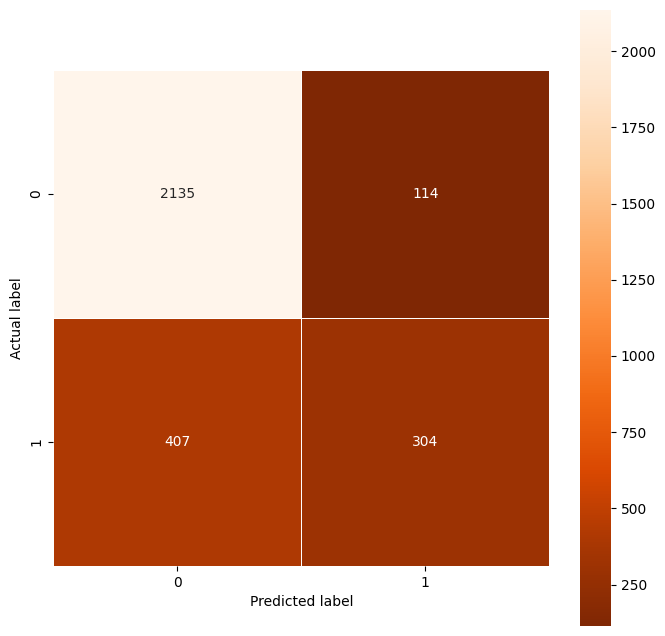

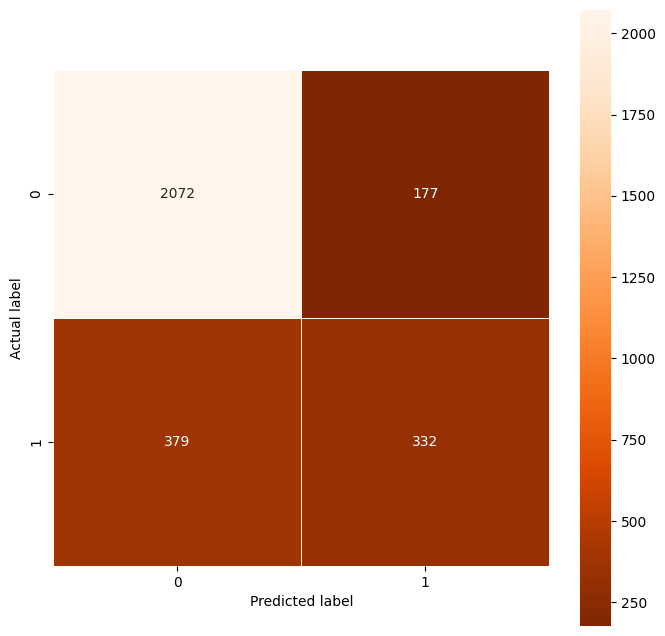

In [35]:
#Creates and displays the cart and c5 classifier's confusion matrices
displayCM(cart_classifier, X_train, y_train, X_test, y_test)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

Uses the compareModels function to compare the accuracy of the cart and c5 classifiers. With the classifers that I created before, the accuracy of both of their training and test data was 82%.

CART Training and Testing scores: 0.82, 0.81
C5.0 Training and Testing scores: 0.81, 0.81


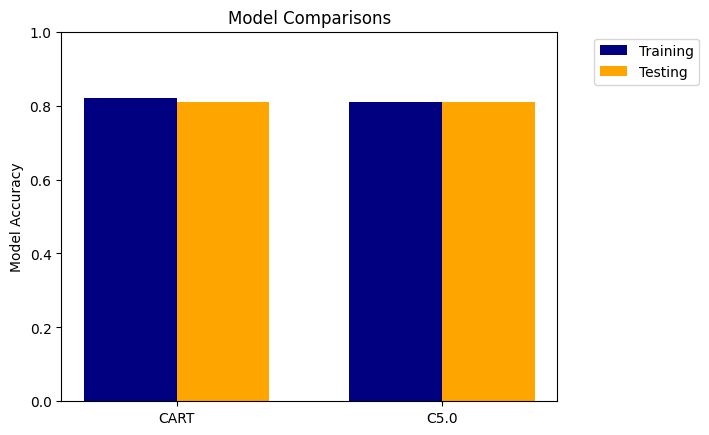

In [36]:
compareModels(cart_classifier, c5_classifier)

2. Based on my results, there appears that the max depth of the classifier has very little if any influence on the acurracy of the model. The only difference in accuracy was that the accuracy of the cart model's training data was 0.81 when the max depth was 2, and 0.82 when the max depth was higher. Other than that the accuracy of everything else was 0.81. When changing the max leaf nodes there was more of a difference in accuracy. While the accuracy didn't change much at first, with only the cart training accuracy going from 0.81 to 0.82 after going from 4 to 5 max leaf nodes there was a large difference when there were no max leaf nodes. The accuracy of both of the training data went up to 0.95 while the accuracy of the testing data went down slightly to 0.79.

CART Training and Testing scores: 0.81, 0.81
C5.0 Training and Testing scores: 0.81, 0.81


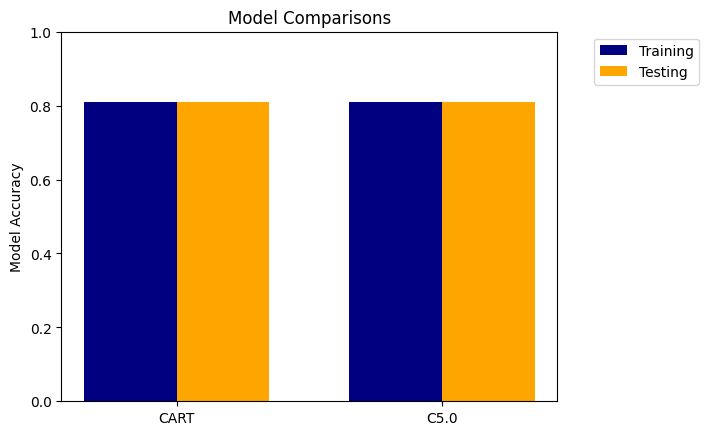

In [37]:
#Creates and compares the cart and c5 classifiers with max depth of 2
cart_classifier = makeDTModel("gini", X_train, y_train, 2, 5)
c5_classifier = makeDTModel("entropy", X_train, y_train, 2, 5)
compareModels(cart_classifier, c5_classifier)

CART Training and Testing scores: 0.82, 0.81
C5.0 Training and Testing scores: 0.81, 0.81


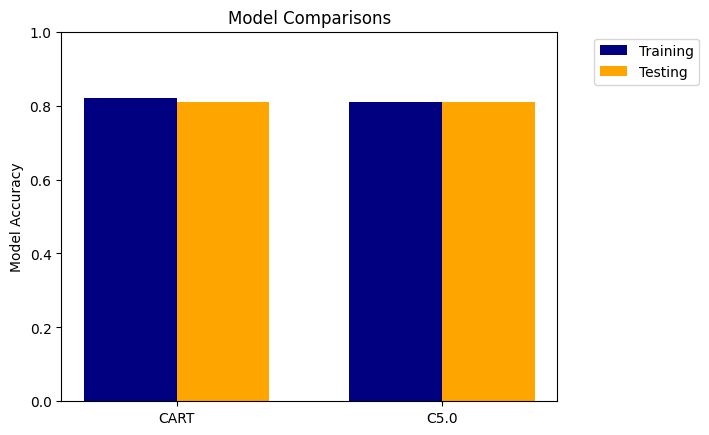

In [38]:
#Creates and compares the cart and c5 classifiers with max depth of 3
cart_classifier = makeDTModel("gini", X_train, y_train, 3, 5)
c5_classifier = makeDTModel("entropy", X_train, y_train, 3, 5)
compareModels(cart_classifier, c5_classifier)

CART Training and Testing scores: 0.82, 0.81
C5.0 Training and Testing scores: 0.81, 0.81


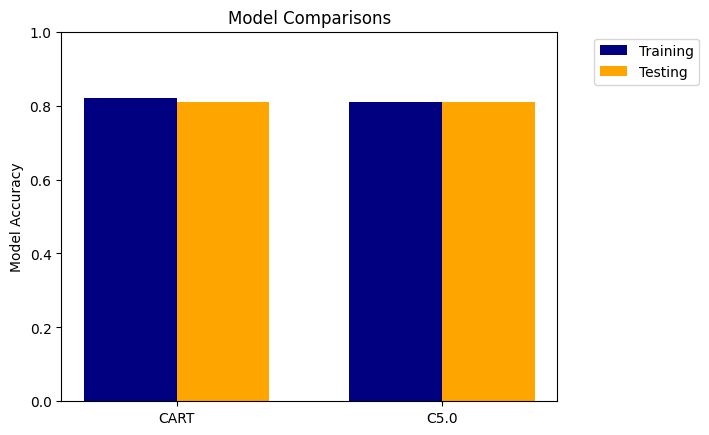

In [39]:
#Creates and compares the cart and c5 classifiers with max depth of 4
cart_classifier = makeDTModel("gini", X_train, y_train, 4, 5)
c5_classifier = makeDTModel("entropy", X_train, y_train, 4, 5)
compareModels(cart_classifier, c5_classifier)

CART Training and Testing scores: 0.82, 0.81
C5.0 Training and Testing scores: 0.81, 0.81


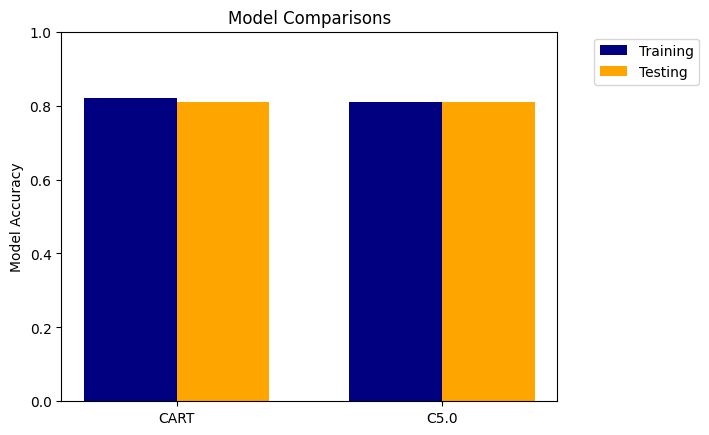

In [40]:
#Creates and compares the cart and c5 classifiers with no max depth
cart_classifier = makeDTModel("gini", X_train, y_train, None, 5)
c5_classifier = makeDTModel("entropy", X_train, y_train, None, 5)
compareModels(cart_classifier, c5_classifier)

CART Training and Testing scores: 0.81, 0.81
C5.0 Training and Testing scores: 0.81, 0.81


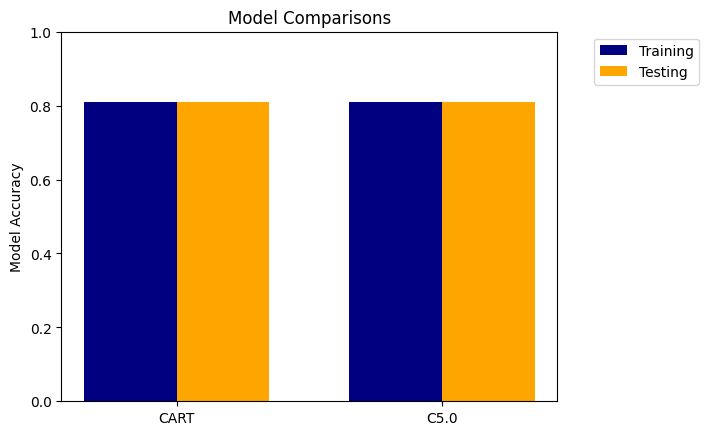

In [41]:
#Creates and compares the cart and c5 classifiers with max leaf nodes of 3
cart_classifier = makeDTModel("gini", X_train, y_train, None, 3)
c5_classifier = makeDTModel("entropy", X_train, y_train, None, 3)
compareModels(cart_classifier, c5_classifier)

CART Training and Testing scores: 0.81, 0.81
C5.0 Training and Testing scores: 0.81, 0.81


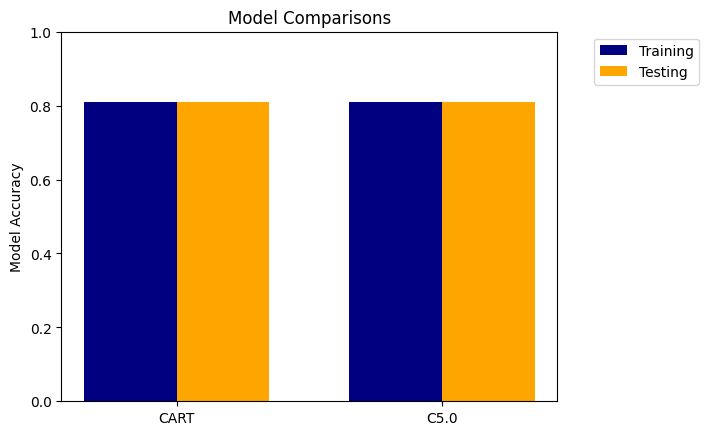

In [42]:
#Creates and compares the cart and c5 classifiers with max leaf nodes of 4
cart_classifier = makeDTModel("gini", X_train, y_train, None, 4)
c5_classifier = makeDTModel("entropy", X_train, y_train, None, 4)
compareModels(cart_classifier, c5_classifier)

CART Training and Testing scores: 0.82, 0.81
C5.0 Training and Testing scores: 0.81, 0.81


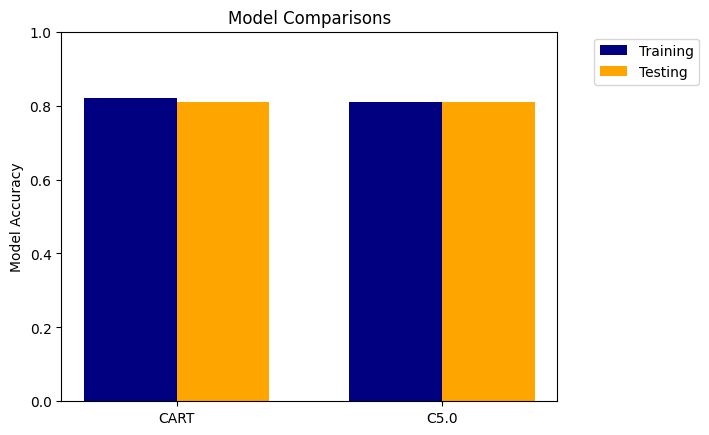

In [43]:
#Creates and compares the cart and c5 classifiers with max leaf nodes of 5
cart_classifier = makeDTModel("gini", X_train, y_train, None, 5)
c5_classifier = makeDTModel("entropy", X_train, y_train, None, 5)
compareModels(cart_classifier, c5_classifier)

CART Training and Testing scores: 0.95, 0.79
C5.0 Training and Testing scores: 0.95, 0.79


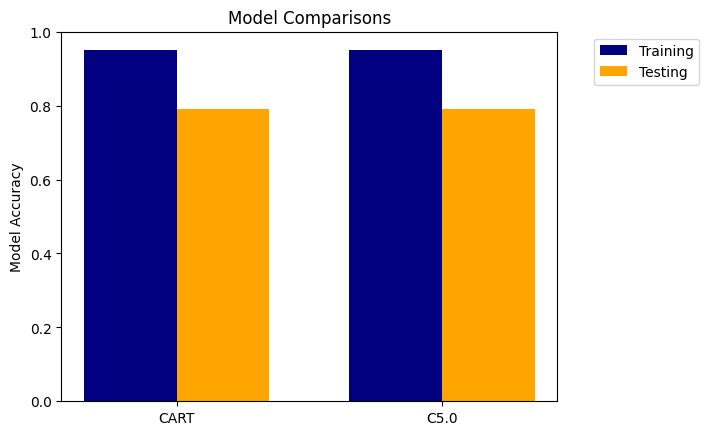

In [44]:
#Creates and compares the cart and c5 classifiers with no max leaf nodes
cart_classifier = makeDTModel("gini", X_train, y_train, None, None)
c5_classifier = makeDTModel("entropy", X_train, y_train, None, None)
compareModels(cart_classifier, c5_classifier)

3. Summary: First I import the adult training data and put the data into the adultDF dataframe. After that I encode the data and put it into the encoded dataframe and split it into training and testing data. Next I create the makeDTModel, displayTree, displayCM, and comapareModels. Next I use the functions to create a cart and c5 classifier, display their trees, display their confusion matrices, and plot the accuracy of the models. After changing the max depth of the classifiers I found that the accuracy of the models barely changes when the max depth was increased, with only the cart training accuracy going from 0.81 to 0.82 when the max depth increases from 2 to 3 and the other accuracies staying at 0.81 no matter the depth. When changing the max leaf nodes the accuracy didn't change much at first, with only the cart training accuracy going from 0.81 to 0.82 after going from 4 to 5 max leaf nodes. However, there was a large difference when there were no max leaf nodes. The accuracy of both of the training data went up to 0.95 while the accuracy of the testing data went down slightly to 0.79.